In [30]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

import numpy as np
import data_handling

In [3]:
scores_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_scores.txt"
actor_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_actorloss.txt"
critic_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_criticloss.txt"

In [4]:
with open(scores_fp, 'r') as f:
    slines = [float(i) for i in f.read().splitlines()]
with open(actor_fp, 'r') as f:
    alines = [float(i) for i in f.read().splitlines()]
with open(critic_fp, 'r') as f:
    clines = [float(i) for i in f.read().splitlines()]    

In [43]:
log_fp = "C:\\Users\\mattdoll\\Development\\deep-reinforcement-learning\\p2_continuous-control\\saves\\D4PG_20190309_v10\\logs\\D4PG_20190309_v10_LOG.txt"

In [45]:
with open(log_fp, 'r') as f:
    loglines = f.read().splitlines()

In [50]:
loglines

['EVAL: False',
 'FORCE_EVAL: False',
 'MAX_STEPS: 1000',
 'NOGRAPHICS: False',
 'NUM_EPISODES: 200',
 'PRETRAIN: 5000',
 'QUIET: False',
 'RESUME: False',
 'SAVE_EVERY: 10',
 'LATEST: False',
 'FILENAME: None',
 'SAVE_DIR: saves',
 'LOAD_FILE: False',
 'DEVICE: cuda:0',
 'FRAMEWORK: D4PG',
 'AGENT_COUNT: 20',
 'ACTOR_LEARN_RATE: 0.0005',
 'CRITIC_LEARN_RATE: 0.001',
 'BATCH_SIZE: 128',
 'BUFFER_SIZE: 400000',
 'ACTION_SIZE: 4',
 'STATE_SIZE: 33',
 'C: 350',
 'E: 0.3',
 'E_DECAY: 1',
 'E_MIN: 0.05',
 'GAMMA: 0.99',
 'ROLLOUT: 5',
 'TAU: 0.0005',
 'UPDATE_TYPE: hard',
 'NUM_ATOMS: 75',
 'VMIN: 0',
 'VMAX: 0.2',
 'ATOMS: tensor([0.0000, 0.0027, 0.0054, 0.0081, 0.0108, 0.0135, 0.0162, 0.0189, 0.0216,',
 '        0.0243, 0.0270, 0.0297, 0.0324, 0.0351, 0.0378, 0.0405, 0.0432, 0.0459,',
 '        0.0486, 0.0514, 0.0541, 0.0568, 0.0595, 0.0622, 0.0649, 0.0676, 0.0703,',
 '        0.0730, 0.0757, 0.0784, 0.0811, 0.0838, 0.0865, 0.0892, 0.0919, 0.0946,',
 '        0.0973, 0.1000, 0.1027, 0.105

In [74]:
pstring = ''
counter = 0
params = ['num_episodes', 'c', 'num_atoms', 'vmin', 'vmax', 'e', 'e_decay', 'e_min', 'gamma', 'actor_learn_rate', 'critic_learn_rate', 'buffer_size', 'batch_size', 'pretrain']
for line in loglines:
    if line.split(':')[0].lower() in params:
        line += '  '
        counter += len(line)
        
        if counter > 80:
            pstring += '\n'
            counter = 0
        pstring += line

In [75]:
pstring

'NUM_EPISODES: 200  PRETRAIN: 5000  ACTOR_LEARN_RATE: 0.0005  \nCRITIC_LEARN_RATE: 0.001  BATCH_SIZE: 128  BUFFER_SIZE: 400000  C: 350  E: 0.3  E_DECAY: 1  E_MIN: 0.05  \nGAMMA: 0.99  NUM_ATOMS: 75  VMIN: 0  VMAX: 0.2  '

In [55]:
logdict = {}
for line in loglines:
    try:
        key, value = line.split(':')
        logdict[key.lower()] = value.strip()
    except:
        pass

'200'

In [ ]:
pstring = ''
pstring += "{} :"

In [86]:
score_x = np.linspace(1, len(slines), len(slines))
actor_x = np.linspace(1, len(alines), len(alines))
critic_x = np.linspace(1, len(clines), len(clines))
xcount = 5
xstep = int(len(slines)/xcount)
xticks = np.linspace(0, len(slines), xcount, dtype=int)
dtop = 0.85

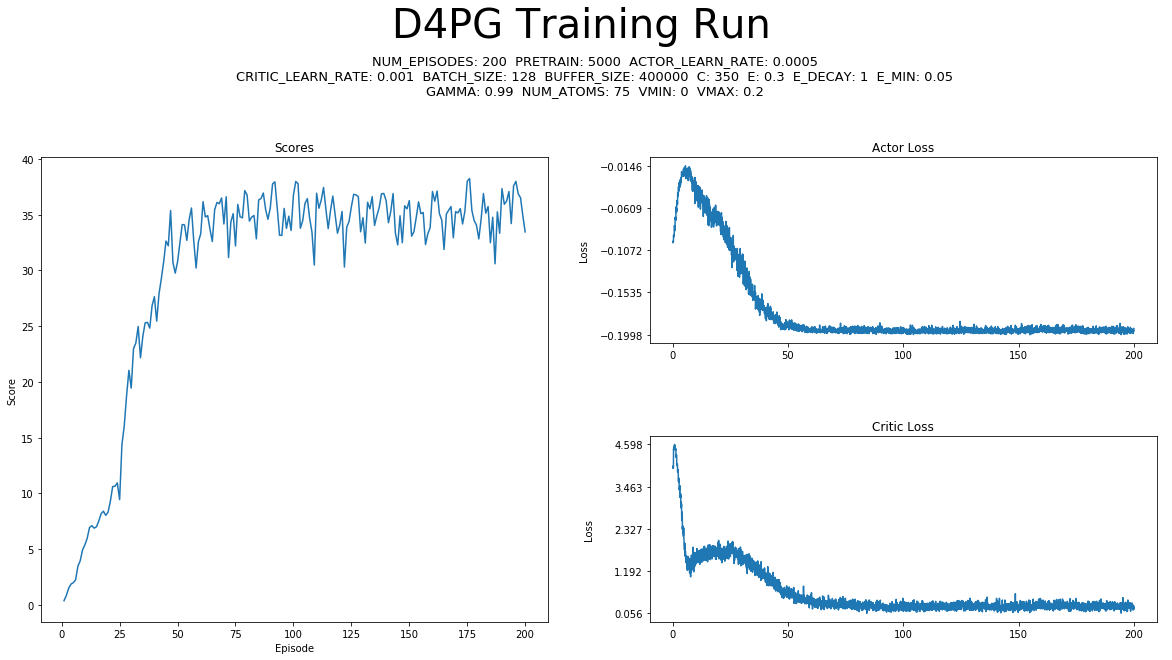

In [89]:
fig = plt.figure(figsize=(20,10))
gs = GridSpec(2, 2, hspace=.5, wspace=.2, top=dtop-0.08)#,  right=1.5)
ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1])
gs2 = GridSpec(1,1, bottom=dtop-0.01, top=dtop)
dummyax = fig.add_subplot(gs2[0,0])
ax1.plot(score_x, slines)
ax1.set_title("Scores")
ax1.set_xlabel("Episode")
ax1.set_ylabel("Score")

ax2.plot(actor_x, alines)
ax2.set_title("Actor Loss")
ax2.set_xticks(np.linspace(0, len(alines), xcount))
ax2.set_xticklabels(xticks)
ax2.set_yticks(np.linspace(min(alines), max(alines), 5))
ax2.set_ylabel("Loss", labelpad=10)


ax3.plot(critic_x, clines)
ax3.set_title("Critic Loss")
ax3.set_xticks(np.linspace(0, len(alines), xcount))
ax3.set_xticklabels(xticks)
ax3.set_yticks(np.linspace(min(clines), max(clines), 5))
ax3.set_ylabel("Loss", labelpad=20)

dummyax.set_title(pstring, size=13)
dummyax.axis("off")

fig.suptitle("D4PG Training Run", size=40)

fig.show()
fig.savefig("graph.png")

## 